# Download the Dataset from Kaggle 
Link: https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020

Import the Libraries

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Import the dataset

In [6]:
!gdown --id https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020/download

Permission denied: https://drive.google.com/uc?id=https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020/download
Maybe you need to change permission over 'Anyone with the link'?


Initialise Kaggle 

In [7]:
! pip install kaggle

In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

Download Dataset from Kaggle

In [11]:
!kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020

indian-currency-note-images-dataset-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip

In [12]:
!unzip /content/indian-currency-note-images-dataset-2020.zip


Archive:  /content/indian-currency-note-images-dataset-2020.zip
replace Indian currency dataset v1/test/100_15.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Inception_V3

In [13]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/Indian currency dataset v1/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255)

VALIDATION_DIR = "/content/Indian currency dataset v1/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)


Found 3566 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [14]:

import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [16]:

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False #it_blocks_that_the_model_cannot_be_trained_anymore
  
# pre_trained_model.summary()

--2021-08-15 15:53:55--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 108.177.111.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   168MB/s    in 0.5s    

2021-08-15 15:53:56 (168 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [17]:

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 74, 74, 32)   96          conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 74, 74, 32)   0           batch_normalization_11[0][0]     
_______________________________________________________________________________________

In [18]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [19]:

from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (8, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 


In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [21]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_11 (BatchNo (None, 74, 74, 32)   96          conv2d_11[0][0]                  
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 74, 74, 32)   0           batch_normalization_11[0][0]     
______________________________________________________________________________________________

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [23]:
checkpoint = ModelCheckpoint('Xception_model.h5', monitor = 'val_accuracy', verbose = 1,
                             save_best_only = True, save_weights_only = False,
                             mode = 'auto')
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 10,
                      verbose = 1, mode = 'auto')

In [24]:

history = model.fit(train_generator, epochs=15, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, callbacks = [checkpoint, early], validation_steps=3)


Epoch 1/15
20/20 [==============================] - ETA: 0s - loss: 3.2032 - accuracy: 0.3853

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


20/20 [==============================] - 197s 10s/step - loss: 3.2032 - accuracy: 0.3853 - val_loss: 0.8643 - val_accuracy: 0.6928

Epoch 00001: val_accuracy improved from -inf to 0.69275, saving model to Xception_model.h5
Epoch 2/15
20/20 [==============================] - 194s 10s/step - loss: 0.5709 - accuracy: 0.8202 - val_loss: 0.5669 - val_accuracy: 0.8116

Epoch 00002: val_accuracy improved from 0.69275 to 0.81159, saving model to Xception_model.h5
Epoch 3/15
20/20 [==============================] - 185s 9s/step - loss: 0.2296 - accuracy: 0.9383 - val_loss: 0.3879 - val_accuracy: 0.8870

Epoch 00003: val_accuracy improved from 0.81159 to 0.88696, saving model to Xception_model.h5
Epoch 4/15
20/20 [==============================] - 186s 9s/step - loss: 0.1421 - accuracy: 0.9671 - val_loss: 0.3756 - val_accuracy: 0.8841

Epoch 00004: val_accuracy did not improve from 0.88696
Epoch 5/15
20/20 [==============================] - 193s 10s/step - loss: 0.0794 - accuracy: 0.9829 - val_l

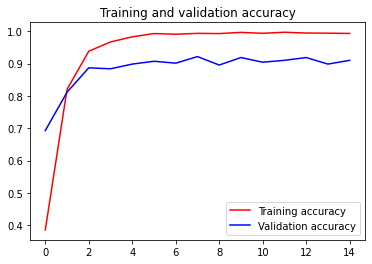

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [26]:

model.save("rps.h5")